# Worksheet

## Auto Encoder Example

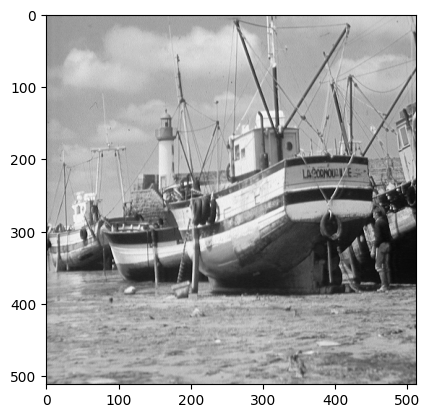

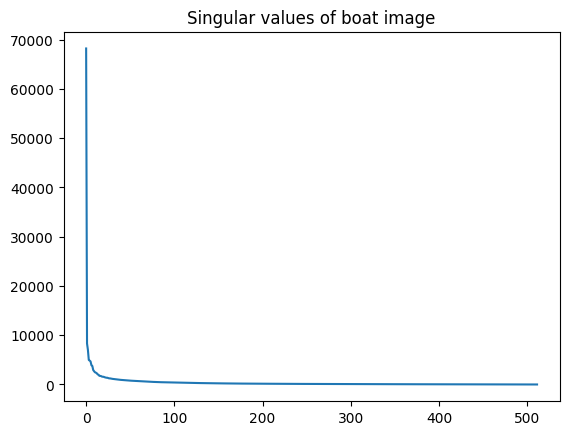

Epoch 1/500


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21649.4668  
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 15315.6074
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 9289.6797 
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 6589.0981
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 6034.6904
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 5963.6670
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 5990.2202
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 5690.3311
Epoch 9/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 5928.5669
Epoch 10/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 5758.9658
Epoch 11/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 5827.2769
Epoch 12/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 5753.1377
Epoch 13/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 5733.4321
Epoch 14/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5682.5342
Epoch 15/500

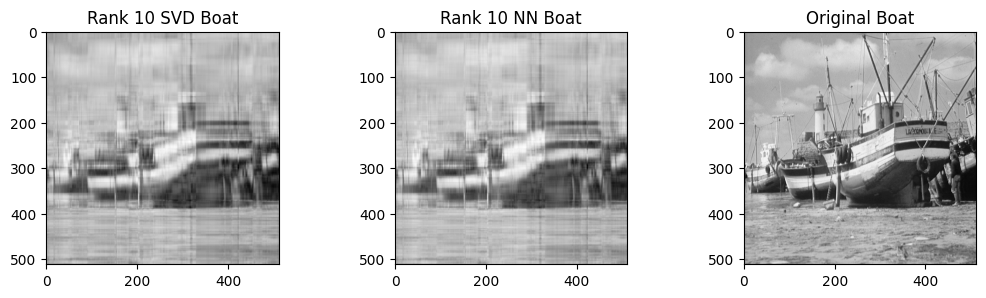

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow import keras, norm
from tensorflow.keras import layers

# Principal Component Extraction using Neural Net
#
# 
#       x[0]            x[0]' 
#          \            /
#           \          /
#            \        /
#       x[1]  \      /  x[1]'
#            \ \    / /   
#         .    \\  //    .
#         .  --- z ---   .
#         .    //  \\    .
#            / /    \ \
#      x[n-1] /      \ x[n-1]' 
#            /        \
#           /          \
#       x[n]             x[n]'
#
# where x' is the approximation of x based on the z components extracted

# MODIFY THIS LINE
RANK = 10

def custom_loss(y_true, y_pred):
    return norm(y_true - y_pred, ord='euclidean')

def frobenius(X, Y):
    return np.linalg.norm(X - Y, ord='fro')

boat = np.loadtxt('./boat.dat')
plt.figure()
_ = plt.imshow(boat,cmap = cm.Greys_r)
plt.show()

u,s,vt=np.linalg.svd(boat,full_matrices=False)
_ = plt.plot(s)
plt.title('Singular values of boat image')
plt.show()

# construct a rank-RANK version of the boat
scopy = s.copy()
scopy[RANK:]=0
boatApprox = u.dot(np.diag(scopy)).dot(vt)

model = keras.models.Sequential()
model.add(layers.Dense(RANK, use_bias=False, input_dim=len(boat)))
model.add(layers.Dense(len(boat), use_bias=False))
model.compile(loss=custom_loss)

history = model.fit(boat, boat, batch_size=50, epochs=500)

boatNNApprox = model.predict(boat)

print("Frobenius Distance between boat and rank-"+str(RANK)+" approximation: ", frobenius(boat, boatApprox))
print("Frobenius Distance between boat and NN output with 1 hidden layer of "+str(RANK)+" neurons: ", frobenius(boat, boatNNApprox))

plt.figure(figsize=(12,9))
plt.subplot(1,3,1)
plt.imshow(boatApprox,cmap = cm.Greys_r)
plt.title('Rank ' + str(RANK) + ' SVD Boat')
plt.subplot(1,3,2)
plt.imshow(boatNNApprox,cmap = cm.Greys_r)
plt.title('Rank ' + str(RANK) + ' NN Boat')
plt.subplot(1,3,3)
plt.imshow(boat,cmap = cm.Greys_r)
plt.title('Original Boat')

_ = plt.subplots_adjust(wspace=0.5)
plt.show()

## CNN Example

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


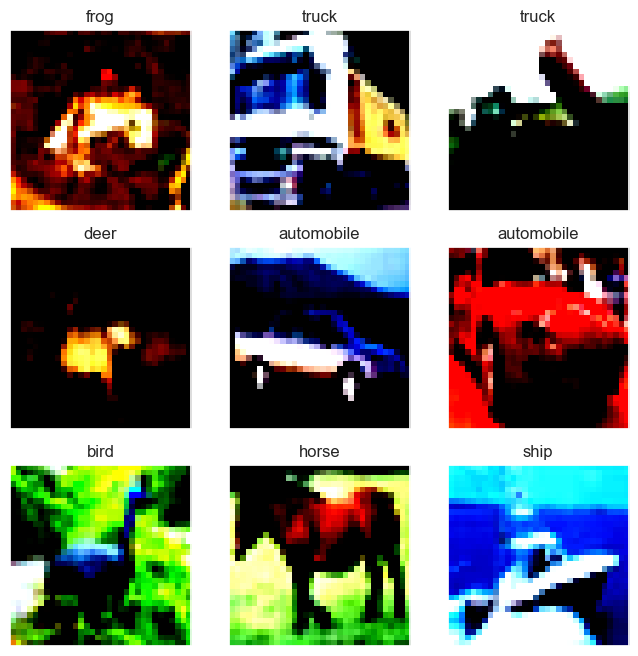

/Users/lance/Documents/BostonUniversity/Data-Science-Fundamentals/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 609ms/step - accuracy: 0.1782 - loss: 2.9918 - val_accuracy: 0.3482 - val_loss: 1.8560
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 588ms/step - accuracy: 0.3601 - loss: 1.8062 - val_accuracy: 0.4615 - val_loss: 1.5036
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 593ms/step - accuracy: 0.4433 - loss: 1.5754 - val_accuracy: 0.4661 - val_loss: 1.5518
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 563ms/step - accuracy: 0.5065 - loss: 1.4065 - val_accuracy: 0.5050 - val_loss: 1.4036
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 560ms/step - accuracy: 0.5403 - loss: 1.2822 - val_accuracy: 0.5427 - val_loss: 1.3561
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 560ms/step - accuracy: 0.5982 - loss: 1.1489 - val_accuracy: 0.6094 - val_loss: 1.1075
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 563ms/step - accuracy: 0.6379 - loss: 1.0277 - val_accuracy: 0.6409 - val_loss: 1.0388
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 560ms/step - accuracy: 0.6709 - loss: 0.9474 - val_accu

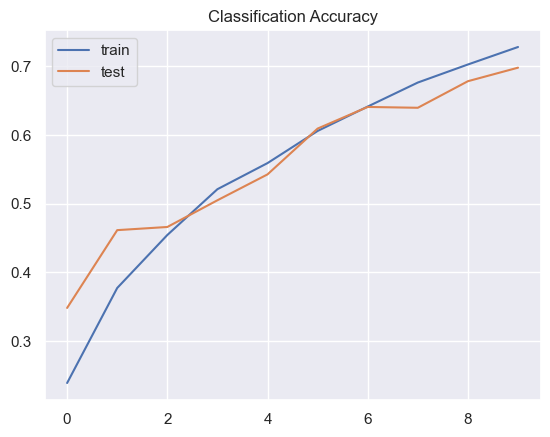

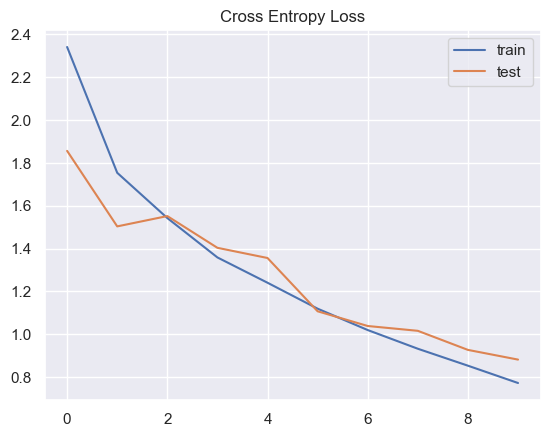

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


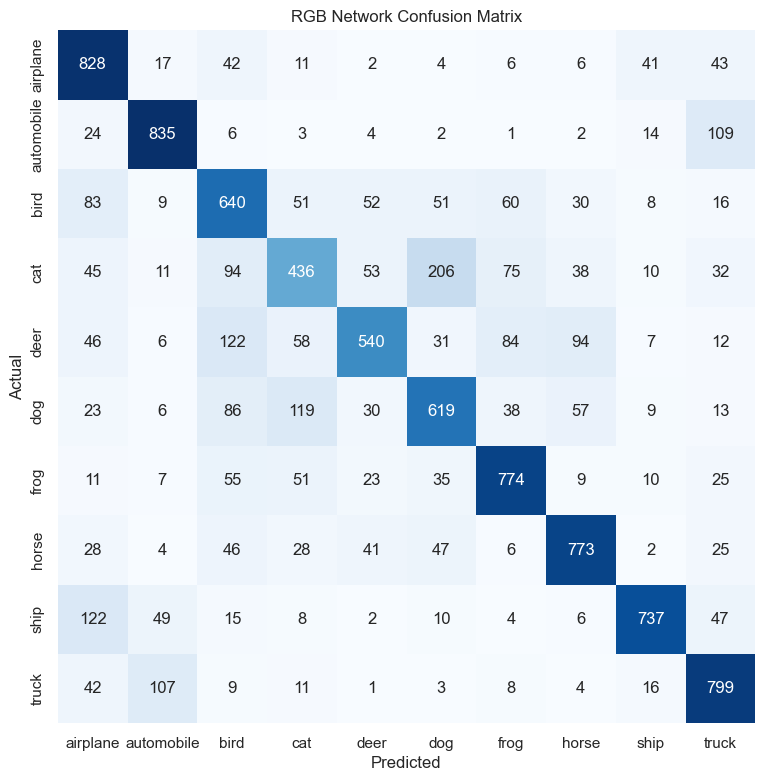

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras import utils
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
mean = np.mean(X_train, axis = (0,1,2))
std = np.std(X_train, axis = (0,1,2))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(8, 8))
index = 0
for i in range(3):
    for j in range(3):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, utils.to_categorical(y_train), epochs=10, batch_size=1000, validation_data=(X_test, utils.to_categorical(y_test)))

plt.plot(history.history["accuracy"], label='train')
plt.plot(history.history["val_accuracy"], label='test')
plt.title('Classification Accuracy')
plt.legend()
plt.show()

plt.plot(history.history["loss"], label='train')
plt.plot(history.history["val_loss"], label='test')
plt.title('Cross Entropy Loss')
plt.legend()
plt.show()

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(predictions,axis=1))
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.title('RGB Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## GAN example

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, ReLU
from PIL import Image as im

TEMPFILE = 'temp.png'

# Define the parameters
np.random.seed(0)
gen_input_dim = 100
epochs = 100
batch_size = 128
images = []

# Define the generator model
generator = Sequential()
generator.add(Dense(32, input_dim=gen_input_dim, activation='tanh'))
generator.add(Dense(2, activation='tanh'))

# Define the discriminator model
discriminator = Sequential()
discriminator.add(Dense(16, input_dim=2))
discriminator.add(ReLU())
discriminator.add(Dense(1, activation='sigmoid'))

# Compile the models
generator.compile(loss='mse')
discriminator.compile(loss='binary_crossentropy')

# Define the GAN model
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy')

# Define the real data
x_real = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 1000)

# Train the GAN
for epoch in range(epochs):
    # Generate fake data
    z = np.random.normal(size=(batch_size, gen_input_dim))
    x_fake = generator.predict(z)

    # Train the discriminator
    discriminator.trainable = True
    discriminator.train_on_batch(x_real, np.ones((len(x_real), 1)))
    discriminator.train_on_batch(x_fake, np.zeros((batch_size, 1)))

    # Train the generator
    discriminator.trainable = False
    gan.train_on_batch(z, np.ones((batch_size, 1)))

    # Plot the progress
    fig, ax = plt.subplots()
    ax.scatter(x_real[:, 0], x_real[:, 1], c='r')
    ax.scatter(x_fake[:, 0], x_fake[:, 1], c='b')
    ax.set_title('Epoch {}'.format(epoch))
    fig.savefig(TEMPFILE)
    plt.close()
    images.append(im.fromarray(np.asarray(im.open(TEMPFILE))))

images[0].save(
    'gan.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=10
)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 